## Защита данных клиентов страховой компании
_____
**Описание исследования.**

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.
_____
**Цель исследования.**

Разработка моделей анонимизации персональных данных
_____
**Исходные данные.**
    
- Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
- Целевой признак: количество страховых выплат клиенту за последние 5 лет.
______



<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Признаки-умножают-на-обратимую-матрицу.-Изменится-ли-качество-линейной-регрессии?" data-toc-modified-id="Признаки-умножают-на-обратимую-матрицу.-Изменится-ли-качество-линейной-регрессии?-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span><ul class="toc-item"><li><span><a href="#Предложите-алгоритм-преобразования-данных-для-решения-задачи.-Обоснуйте,-почему-качество-линейной-регрессии-не-поменяется." data-toc-modified-id="Предложите-алгоритм-преобразования-данных-для-решения-задачи.-Обоснуйте,-почему-качество-линейной-регрессии-не-поменяется.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.</a></span></li></ul></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

## Загрузка данных

In [2]:
import warnings

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import phik
from phik.report import plot_correlation_matrix
from phik import report

# настройки
warnings.filterwarnings("ignore")

In [3]:
try:
    data = pd.read_csv('/datasets/insurance.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

In [4]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [7]:
data['Страховые выплаты'].unique()

array([0, 1, 2, 3, 5, 4], dtype=int64)

In [18]:
# plt.figure() 
# mask = np.triu(np.ones_like(phik_overview, dtype=bool)) 
# heatmap = sns.heatmap(phik_overview, mask=mask, annot=True, vmin=-1, vmax=1, cmap= 'coolwarm', linewidths=3) 
# heatmap.set_title('Phik корреляция');

**Посмотрим корреляцию**
Функция corr() по дефолту считает корреляцию Пирсона. Но данный вид корреляции, во-первых, способен улавливать только линейные взаимосвязи, во-вторых, основан на предположениях, что переменные распределены нормально и однородны (представляют одну генеральную совокупность, не имеют выбросов), что далеко не всегда выполняется. Нарушение данных предположений может приводить к некорректной оценке степени корреляции, что будет вводить нас в заблуждение.

Помимо корреляции Пирсона проверим Phik корреляцию, у которой нет таких строгих предположений, и к тому же она способно улавливать нелинейные взаимосвязи, которые будут моделироваться в линейной регрессии немного иначе в зависимости от характера взаимосвязи.

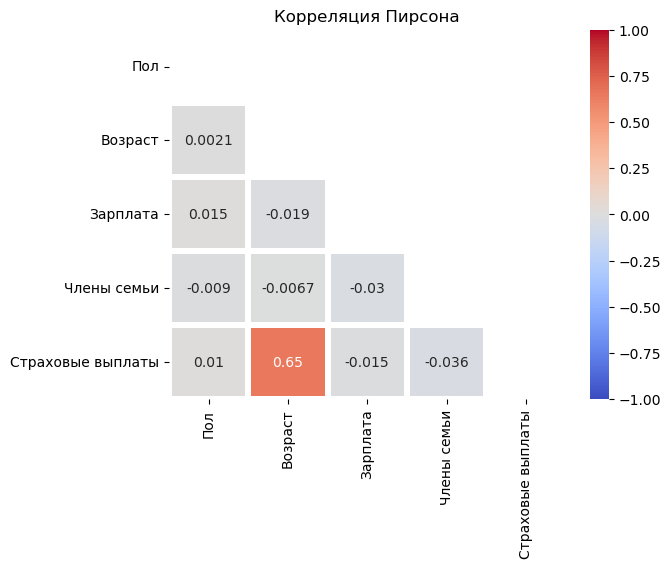

In [17]:
plt.figure() 
mask = np.triu(np.ones_like(data.corr(numeric_only=True), dtype=bool)) 
heatmap = sns.heatmap(data.corr(numeric_only=True), mask=mask, annot=True, vmin=-1, vmax=1, cmap= 'coolwarm', linewidths=3) 
heatmap.set_title('Корреляция Пирсона');

In [8]:
phik_overview = data.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты']


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.00,0.00,0.00,0.0,0.03
Возраст,0.00,1.00,0.07,0.0,0.88
Зарплата,0.00,0.07,1.00,0.0,0.00
Члены семьи,0.00,0.00,0.00,1.0,0.00
Страховые выплаты,0.03,0.88,0.00,0.0,1.00


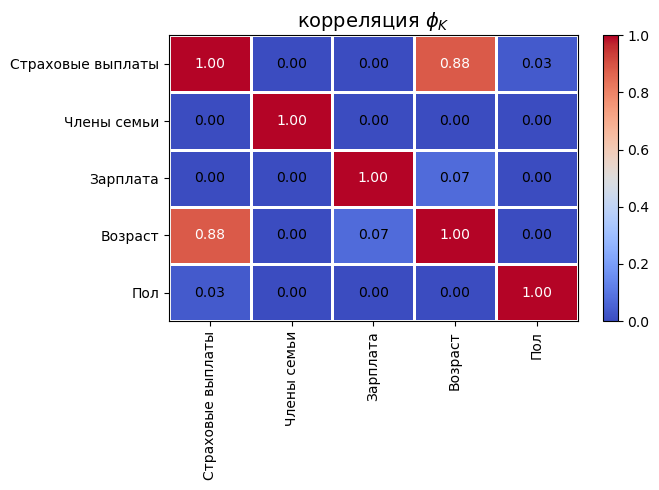

In [19]:
#Значимость корреляций
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="coolwarm", 
                        title=r"корреляция $\phi_K$", 
                        fontsize_factor=1,
                        )
plt.tight_layout()

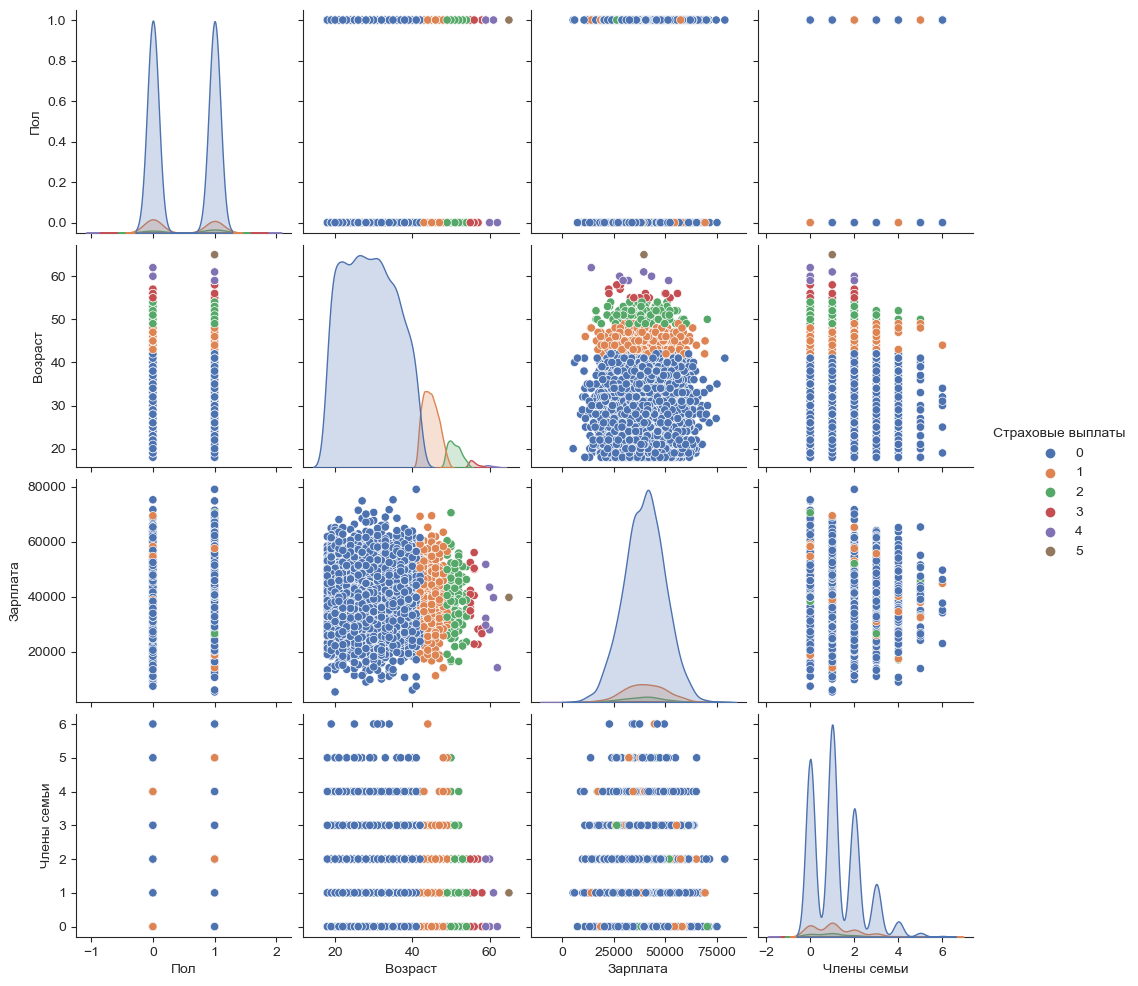

In [20]:
sns.set_style("ticks")
sns.pairplot(data, hue = 'Страховые выплаты', diag_kind = "kde", kind = "scatter", palette = "deep")
plt.show()


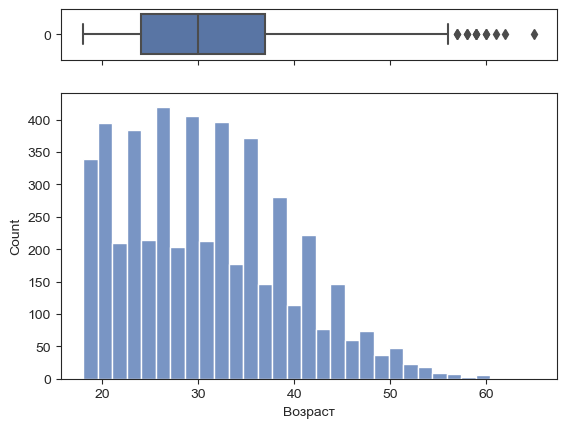

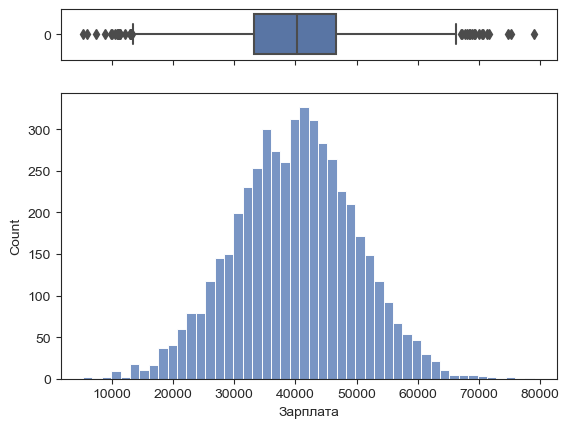

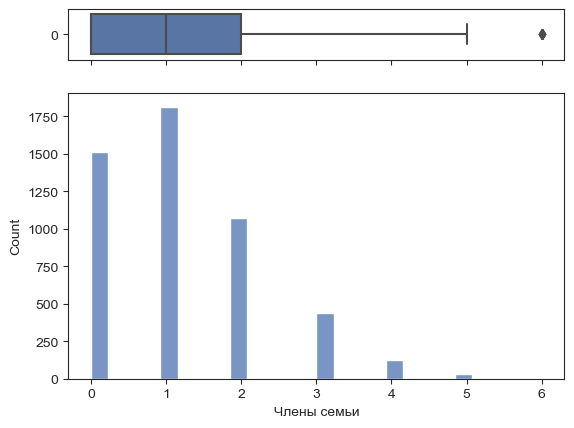

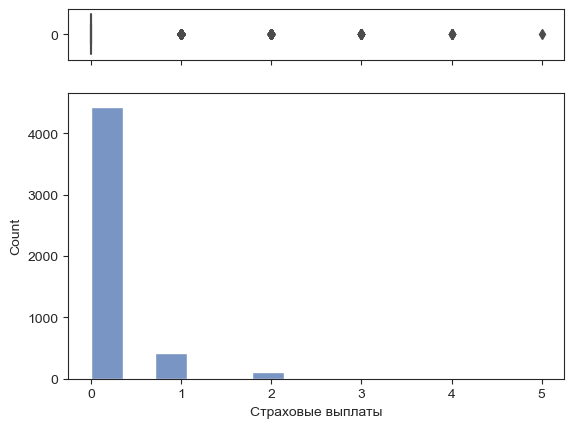

In [24]:
for i in data.columns[1:]:
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data[i], ax=ax_box, orient="h")
    sns.histplot(data=data, x=i, ax=ax_hist)
    sns.set_palette(sns.color_palette('deep'))
    plt.show()

In [25]:
features = data.drop(['Страховые выплаты'], axis=1)
target = data['Страховые выплаты']

In [26]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25)
print(features_train.shape, target_train.shape)
print(features_test.shape, target_test.shape)

(3750, 4) (3750,)
(1250, 4) (1250,)


**Вывод:** 
- В данных отсутствуют пропуски;
- Помимо корреляции Пирсона проверим Phik корреляцию. Отследили взаимосвязь между возрастом и страховыми выплатами
- По графикам можем заметить, что чем старже клиент, тем больше у него было страховых выплат
- разделили наши данные на тренировочную и тестовые выборки в соотношение 75:25

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

###  Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? 

In [27]:
#Создадим матрицу размером, совпадающим с шириной нашей выборки
matrix = np.random.normal(4, size=(4,4))
matrix

array([[5.09217859, 4.73602263, 5.01457756, 4.21421745],
       [3.79937881, 3.72745834, 3.44079719, 3.8105467 ],
       [2.65414302, 2.70107353, 2.12872594, 3.17837248],
       [4.45779854, 3.14919075, 4.23593434, 4.18307104]])

In [28]:
#и проверим ее на обратимость
np.linalg.inv(matrix)

array([[ 19.36384285, -46.40729608,  31.07013024,  -0.8411816 ],
       [ -0.51356377,   2.58122177,  -1.34187308,  -0.81438355],
       [-13.16874846,  31.9421373 , -22.19389404,   1.03259679],
       [ -6.91378322,  15.16608739,  -9.62610695,   0.70294169]])

In [37]:
#перепроверим себя. вычислим определитель нашей матрицы. Если он не равен нулю, значит, у нее есть обратная
np.linalg.det(matrix)

-0.1743362555464098

In [29]:
model_lr = LinearRegression()
model_lr.fit(features_train, target_train)
predict = model_lr.predict(features_test)
print('r2_score для неизмененной матрицы', r2_score(target_test, predict))

r2_score для неизмененной матрицы 0.41577004576963406


In [30]:
model_lr_m = LinearRegression()
model_lr_m.fit(features_train @ matrix, target_train)
predict_m = model_lr_m.predict(features_test @ matrix)
print('r2_score для измененной матрицы', r2_score(target_test, predict_m))

r2_score для измененной матрицы 0.41577004579236554


**Ответ:** Не изменится.

**Обоснование:** 
$$
\hat{y} = Xw
$$

$$
w = (X^T X)^{-1} X^T y
$$

преобразуем формулу 

$$
\hat{y} = X * (X^T X)^{-1} X^T y
$$

раскроем скобки

$$
\hat{y} = X * (X^T)^{-1} * (X)^{-1} X^T y
$$

у единичной матрицы есть свойство:

$$
A*A^{-1}=E
$$
где **E** - единичная матрица

применим это свойство и получим:

$$
\hat{y} = E E y
$$

$$
\hat{y} = y
$$

***что и требовалось доказать***

**Обоснование:**

Используемые свойства:
$$
(AB)^T=B^T A^T
$$
$$
(AB)^{-1} = B^{-1} A^{-1}
$$
$$
A A^{-1} = A^{-1} A = E
$$
$$
AE = EA = A
$$
Доказательство:
$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$
\
Требуется доказать, что предсказания не изменятся, имеем  $a =  Xw$,   $a' = X'w'$
\
\
$$
    w = (X^T X)^{-1} X^T y
$$
\
$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} P^T X^T y
$$
$$
w' = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$
$$
w' = P^{-1} (X^T X)^{-1} X^T y
$$

у нас есть формула:

$$
w = (X^T X)^{-1} X^T y
$$

т.е.
$$
w' = P^{-1} w
$$
$$
a = a'
$$

что и требовалось доказать 🐱

## Алгоритм преобразования

### Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.

**Алгоритм** Преобразуем наши данные через  StandardScaler модуля preprocessing библиотеки sklearn. 


**Обоснование** Наши данные имеют распределение близкое к нормальному. Имеет смысл прибегнуть к стандартизации.
приведем формулу:
$$
x` = \frac{x - \mu}{\sigma}
$$

где:
$$
x - признак, который необходимо изменить
$$
$$
\mu - среднее значение
$$
$$
\sigma - стандартное отклонение
$$

## Проверка алгоритма

In [31]:
st_scaler = StandardScaler().fit(features_train)
st_scaler

StandardScaler()

In [32]:
# выведем среднее арифметическое
st_scaler.mean_

array([4.89600000e-01, 3.10181333e+01, 3.99294933e+04, 1.19146667e+00])

In [33]:
# и СКО каждого из столбцов
st_scaler.scale_

array([4.99891828e-01, 8.45541668e+00, 9.85521044e+03, 1.09160761e+00])

Метод .fit_transform() сразу вычисляет статистические показатели и применяет их для масштабирования данных.

In [34]:
features_train_scaled = pd.DataFrame(StandardScaler().fit_transform(features_train), columns = features_train.columns)

In [35]:
st_scaler = StandardScaler().fit(features_test)
features_test_scaled = pd.DataFrame(StandardScaler().fit_transform(features_test), columns = features_test.columns)

In [36]:
model_lr_scaler = LinearRegression()
model_lr_scaler.fit(features_train_scaled, target_train)
predict_scaler = model_lr_scaler.predict(features_test_scaled)
print('r2_score после стандартизации ', r2_score(target_test, predict_scaler))

r2_score после стандартизации  0.4147222030854081


## Вывод

Нам нужно было защитить данные лиентов страховой компании «Хоть потоп». Мы разработали метод преобразования данных через  StandardScaler модуля preprocessing библиотеки sklearn. 
Качество модели машинного обучения не ухудшилоссь.
При сравнении качество предсказаний метрика r2 осталась неизменной.